In [ ]:
### Import all necessary libraries

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import folium
from folium import plugins
%matplotlib inline

In [13]:
### Read the data 
df=pd.read_csv("data.csv")
df.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191609699,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,1230,16,Foothill,1645,997,TRAFFIC COLLISION,NaN,...,STREET,PIERCE ST,NORRIS AV,"{'latitude': '34.2674', 'longitude': '-118.413...",18907.0,33.0,1370.0,NaN,1.0,11.0
1,190911647,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,550,9,Van Nuys,991,997,TRAFFIC COLLISION,NaN,...,STREET,MULHOLLAND,WOODCLIFF,"{'latitude': '34.1305', 'longitude': '-118.461...",24037.0,340.0,672.0,46.0,7.0,83.0
2,190410505,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,340,4,Hollenbeck,412,997,TRAFFIC COLLISION,0605,...,STREET,AVENUE 26,DALY,"{'latitude': '34.0784', 'longitude': '-118.217...",23448.0,485.0,648.0,NaN,11.0,1.0


#### Drop unnecessary columns

In [14]:
df.drop(columns=['Crime Code','Crime Code Description','DR Number'],inplace=True)
df=df[(df['Victim Sex']=='M') | (df['Victim Sex']=='F')]
df=df[(df['Victim Age']>=0)]
df['Victim Age Group']=df['Victim Age'].apply(lambda x: "<16" if x<16 else
                                              "16-25" if x>=16 and x<25 else
                                              "25-35" if x>=25 and x<35 else
                                              "35-45" if x>=35 and x<45 else
                                              "45-55" if x>=45 and x<55 else
                                              "55-65" if x>=55 and x<65 else
                                              "65-75" if x>=65 and x<75 else
                                              "75-85" if x>=75 and x<85 else
                                              "85-95" if x>=85 and x<95 else
                                              ">95")

### Plot graph based on gender

Text(0.5, 1.0, 'Victims based on Gender')

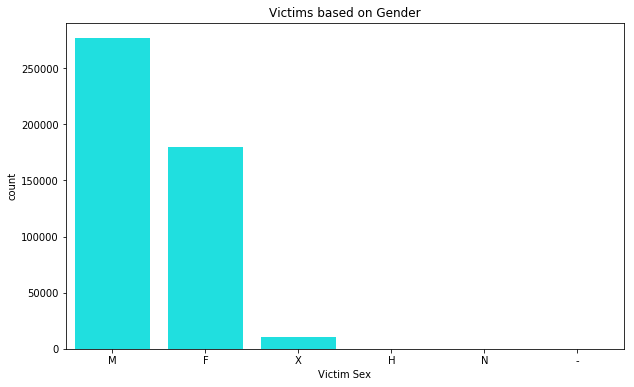

In [50]:
plt.subplots(figsize=(10,6))
sex=df.groupby('Victim Sex').size().reset_index(name='count').sort_values(by='count',ascending=False)
sex
sns.barplot(x='Victim Sex',y='count',data=sex,color='aqua').set_title("Victims based on Gender")

In [85]:
df.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,MO Codes,Victim Age,Victim Sex,...,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),Victim Age Group
0,191609699,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,1230,16,Foothill,1645,NaN,99.0,M,...,PIERCE ST,NORRIS AV,"{'latitude': '34.2674', 'longitude': '-118.413...",18907.0,33.0,1370.0,NaN,1.0,11.0,>95
1,190911647,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,550,9,Van Nuys,991,NaN,35.0,F,...,MULHOLLAND,WOODCLIFF,"{'latitude': '34.1305', 'longitude': '-118.461...",24037.0,340.0,672.0,46.0,7.0,83.0,35-45
3,190911638,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,25,9,Van Nuys,952,NaN,32.0,M,...,MAGNOLIA BL,SEPULVEDA BL,"{'latitude': '34.1649', 'longitude': '-118.466...",19735.0,246.0,649.0,NaN,7.0,83.0,25-35


### Plot graph by area wise victims

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text xticklabel objects>)

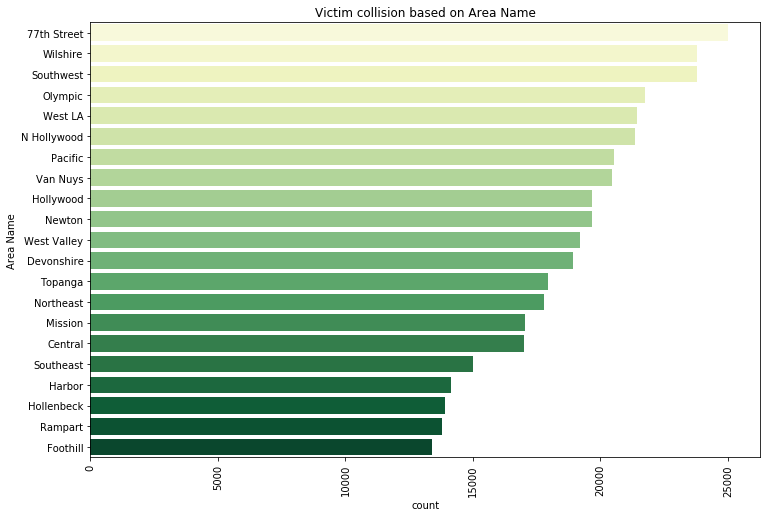

In [178]:
plt.subplots(figsize=(12,8))
area=df.groupby('Area Name').size().reset_index(name='count').sort_values(by='count',ascending=False)
area
ax=sns.barplot(y='Area Name',x='count',data=area,palette="YlGn").set_title("Victim collision based on Area Name")
plt.xticks(rotation=90)

### Plot graph of victims based on gender and area name

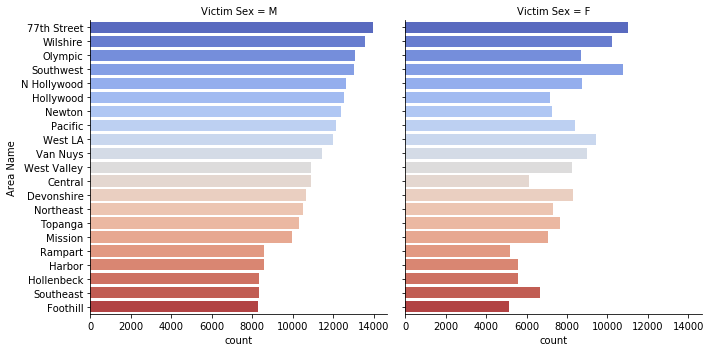

In [180]:
#plt.subplots(figsize=(12,8))
area=df.groupby(['Area Name','Victim Sex']).size().reset_index(name='count').sort_values(by='count',ascending=False)
area
ax=sns.catplot(
    y='Area Name',x='count',
    col='Victim Sex',data=area,
    palette="coolwarm",kind='bar')#.set_title("Victim collision based on Gender and Area Name")
#plt.xticks(rotation=90)

# Plot graph based on victim's age and gender

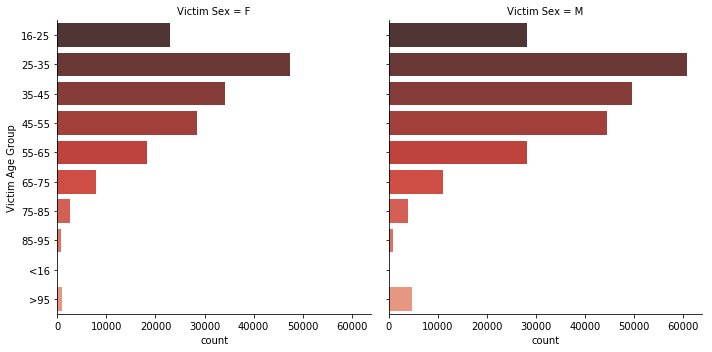

In [15]:
area=df.groupby(['Victim Sex','Victim Age Group']).size().reset_index(name='count')
area
ax=sns.catplot(
    y='Victim Age Group',x='count',
    col='Victim Sex',data=area,
    palette="Reds_d",kind='bar')#.set_title("Victim collision based on Gender and Area Name")

In [19]:
df[~(df['Victim Age']>16)]

,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,MO Codes,Victim Age,Victim Sex,Victim Descent,...,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),Victim Age Group
73,2019-06-01T00:00:00.000,2019-05-31T00:00:00.000,1840,17,Devonshire,1779,NaN,16.0,M,H,...,TUPPER ST,HASKELL AV,"{""latitude"": ""34.2392"", ""longitude"": ""-118.4763""}",18914.0,117.0,1096.0,NaN,2.0,88.0,16-25
231,2019-05-29T00:00:00.000,2019-05-29T00:00:00.000,755,13,Newton,1343,3101 3401 3701 3008 3025,15.0,M,H,...,GRIFFITH AV,MARTIN LUTHER KING JR BL,"{""latitude"": ""34.0111"", ""longitude"": ""-118.2628""}",22727.0,712.0,673.0,7.0,13.0,6.0,<16
243,2019-05-29T00:00:00.000,2019-05-29T00:00:00.000,1640,18,Southeast,1822,NaN,13.0,F,H,...,92ND ST,MAIN ST,"{""latitude"": ""33.9469"", ""longitude"": ""-118.2772""}",22352.0,804.0,1172.0,7.0,14.0,45.0,<16
362,2019-05-28T00:00:00.000,2019-05-28T00:00:00.000,1543,14,Pacific,1443,NaN,16.0,M,W,...,VENICE BL,LYCEUM AV,"{""latitude"": ""33.9994"", ""longitude"": ""-118.442""}",24031.0,900.0,854.0,10.0,10.0,27.0,16-25
439,2019-05-27T00:00:00.000,2019-05-27T00:00:00.000,2130,7,Wilshire,738,NaN,16.0,M,B,...,HIGHLAND AV,3RD,"{""latitude"": ""34.0689"", ""longitude"": ""-118.3386""}",23667.0,577.0,1228.0,NaN,6.0,86.0,16-25
1329,2019-05-21T00:00:00.000,2019-05-21T00:00:00.000,1640,14,Pacific,1494,1300 0605,16.0,M,O,...,SEPULVEDA BL,CENTURY BL,"{""latitude"": ""33.9445"", ""longitude"": ""-118.3961""}",23676.0,2340.0,445.0,12.0,10.0,16.0,16-25
1346,2019-05-21T00:00:00.000,2019-05-21T00:00:00.000,808,19,Mission,1985,NaN,12.0,M,H,...,PARTHENIA,TOBIAS,"{""latitude"": ""34.2279"", ""longitude"": ""-118.4516""}",19730.0,144.0,417.0,NaN,3.0,59.0,<16
1404,2019-05-20T00:00:00.000,2019-05-20T00:00:00.000,2200,5,Harbor,532,0605,16.0,M,H,...,PACIFIC COAST HY,RONAN AV,"{""latitude"": ""33.7906"", ""longitude"": ""-118.2739""}",3350.0,954.0,641.0,NaN,15.0,15.0,16-25
1439,2019-05-20T00:00:00.000,2019-05-20T00:00:00.000,1700,19,Mission,1966,3003 3037 3025 3101 3401 3701 4019,10.0,M,H,...,LIGGETT ST,SYLMAR,"{""latitude"": ""34.2393"", ""longitude"": ""-118.4462""}",19730.0,136.0,319.0,NaN,3.0,59.0,<16
1776,2019-05-19T00:00:00.000,2019-05-18T00:00:00.000,900,20,Olympic,2083,0605,13.0,M,H,...,WESTERN AV,18TH ST,"{""latitude"": ""34.0418"", ""longitude"": ""-118.309""}",22723.0,674.0,898.0,NaN,12.0,19.0,<16


In [111]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'MO Codes', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description',
       'Address', 'Cross Street', 'Location', 'Zip Codes', 'Census Tracts',
       'Precinct Boundaries', 'LA Specific Plans', 'Council Districts',
       'Neighborhood Councils (Certified)', 'Victim Age Group'],
      dtype='object')

### Get Location details

In [35]:
#df['Location']=df['Location'].apply(lambda x:x.split(", 'human_address'")[0].replace('\'','\"')+"}")
#df['Location']=df['Location'].apply(lambda x:x.replace("{","").replace("}","").replace("\"","").replace(":","").replace("latitude","").replace("longitude","").replace(" ",""))
df['Latitude']=df['Location'].apply(lambda x:float(x.split(",")[0]))
df['Longitude']=df['Location'].apply(lambda x:float(x.split(",")[1]))

### Compute collision details

In [133]:
location=df.groupby(['Latitude','Longitude','Area Name']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>5]
location['color']=location['count'].apply(lambda count:"Black" if count>=400 else
                                         "green" if count>=300 and count<400 else
                                         "Orange" if count>=200 and count<300 else
                                         "darkblue" if count>=150 and count<200 else
                                         "red" if count>=100 and count<150 else
                                         "lightblue" if count>=75 and count<100 else
                                         "brown" if count>=50 and count<75 else
                                         "grey")
location['size']=location['count'].apply(lambda count:12 if count>=400 else
                                         10 if count>=300 and count<400 else
                                         8 if count>=200 and count<300 else
                                         6 if count>=150 and count<200 else
                                         4 if count>=100 and count<150 else
                                         2 if count>=75 and count<100 else
                                         1 if count>=50 and count<75 else
                                         0.1)
location

,Latitude,Longitude,Area Name,count,color,size
30919,34.2012,-118.4662,Van Nuys,435,Black,12.0
33160,34.2216,-118.4488,Mission,429,Black,12.0
6450,33.9892,-118.3089,77th Street,414,Black,12.0
30944,34.2012,-118.4313,Van Nuys,374,green,10.0
28001,34.1721,-118.4662,Van Nuys,357,green,10.0
29329,34.1867,-118.4662,Van Nuys,348,green,10.0
34320,34.2355,-118.5536,Devonshire,346,green,10.0
22616,34.1016,-118.3387,Hollywood,324,green,10.0
9564,34.0183,-118.3556,Southwest,312,green,10.0
30930,34.2012,-118.4487,Van Nuys,306,green,10.0


### Create a map with the longitude and latitude co-ordinates

In [138]:
m=folium.Map([34.2012,-118.4662],zoom_start=11)
#location=location[0:2000]
for lat,lon,area,color,count,size in zip(location['Latitude'],location['Longitude'],location['Area Name'],location['color'],location['count'],location['size']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)
m.save('LA collisions.html')

### Get the year after year collisions

In [145]:
df['Year']=pd.DatetimeIndex(df['Date Occurred']).year
df['Month']=pd.DatetimeIndex(df['Date Occurred']).month

,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,MO Codes,Victim Age,Victim Sex,Victim Descent,...,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),Victim Age Group,Latitude,Longitude,Year,Month
0,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,1230,16,Foothill,1645,NaN,99.0,M,O,...,33.0,1370.0,NaN,1.0,11.0,>95,34.2674,-118.4130,2019,6
1,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,550,9,Van Nuys,991,NaN,35.0,F,W,...,340.0,672.0,46.0,7.0,83.0,35-45,34.1305,-118.4610,2019,6
3,2019-06-01T00:00:00.000,2019-06-01T00:00:00.000,25,9,Van Nuys,952,NaN,32.0,M,W,...,246.0,649.0,NaN,7.0,83.0,25-35,34.1649,-118.4662,2019,6


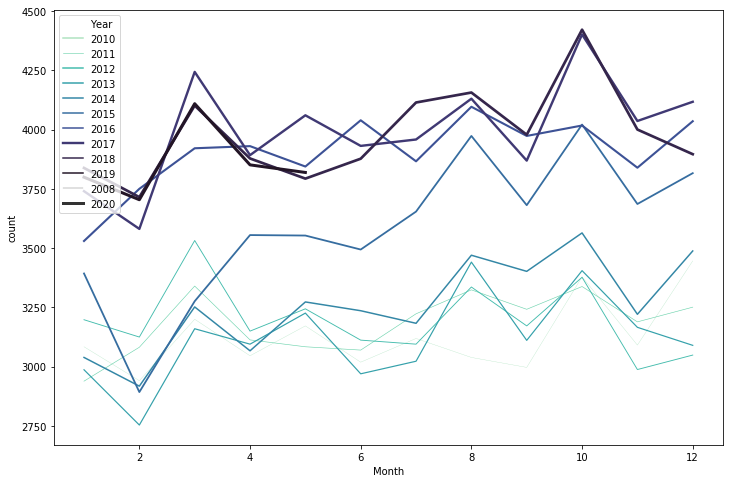

In [176]:
plt.subplots(figsize=(12,8))
palette = sns.color_palette("mako_r", 10)
yearly_stats=df.groupby(['Year','Month']).size().reset_index(name='count')[:-1]
sns.lineplot(x='Month',y='count',hue='Year',
             palette=palette,markers=True,dashes=False,
             size='Year',sizes=(.3,3),data=yearly_stats)

In [120]:
location[location['count']==1]

,Latitude,Longitude,Area Name,count,color
37450,34.2803,-118.3851,Foothill,1,brown
31834,34.2094,-118.5994,Topanga,1,brown
27,33.7070,-118.2928,Harbor,1,brown
38367,34.3200,-118.4256,Mission,1,brown
5834,33.9834,-118.3187,77th Street,1,brown
33199,34.2217,-118.4144,N Hollywood,1,brown
31709,34.2084,-118.4991,West Valley,1,brown
31725,34.2085,-118.4749,Van Nuys,1,brown
37544,34.2827,-118.5043,Devonshire,1,brown
38368,34.3200,-118.4019,Mission,1,brown


In [150]:
# convert to (n, 2) nd-array format for heatmap
location1=location[0:100]
location_data = location[['Latitude', 'Longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(location_data, radius=15))
m.save('heatmap.html')

c:\users\madhu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\madhu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  


In [187]:
m=folium.Map([-37.8355,144.993],zoom_start=11)
folium.CircleMarker([-37.8355,144.993],
                            popup="check",
                            radius=50,
                            color='b',
                            fill=True,
                            fill_opacity=0.3,
                            fill_color='Red',
                           ).add_to(m)
m